## Building CNN Using Keras

### Dataset-> Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.utils import np_utils
import tensorflow

Using TensorFlow backend.


## Data Preparation

In [3]:
x = pd.read_csv("./Dataset/fashion-mnist.csv")
X_ = np.array(x)
X = X_[:,1:]
X = X/255.0
y = X_[:,0]
print(X.shape,y.shape) #10 classes

(10000, 784) (10000,)


In [4]:
np.unique(y,return_counts=True) #Well Balanced

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

In [5]:

X_train = X.reshape((-1,28,28,1))
Y_train = np_utils.to_categorical(y)  #One Hot Implemented here!

print(X_train.shape,Y_train.shape)

(10000, 28, 28, 1) (10000, 10)


In [6]:

import matplotlib.pyplot as plt

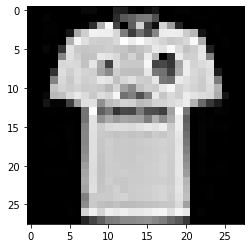

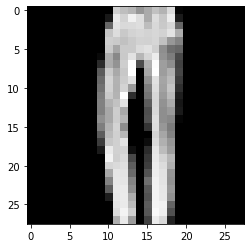

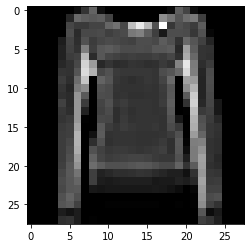

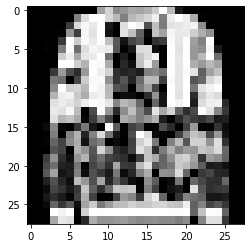

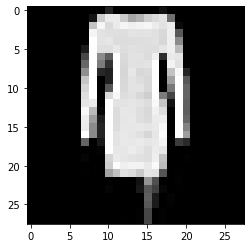

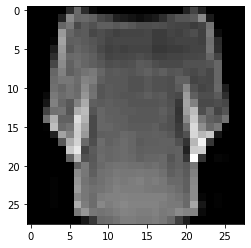

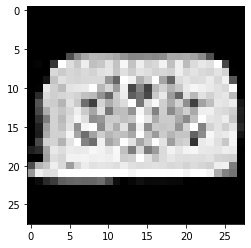

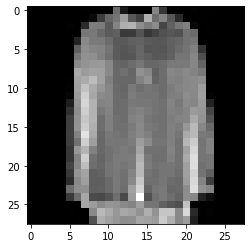

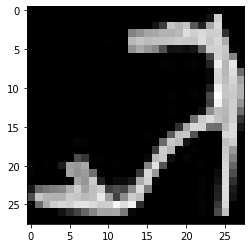

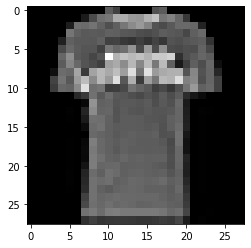

In [7]:
for i in range(10):
    plt.imshow(X_train[i].reshape(28,28),cmap="gray")
    plt.show()

## CNN Model

In [8]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_1 (Flatten)          (None, 128)              

In [9]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [10]:

hist = model.fit(X_train,Y_train,epochs=20,shuffle=True,batch_size=256,validation_split=0.20)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 19s 2ms/step - loss: 1.6574 - accuracy: 0.4257 - val_loss: 1.0364 - val_accuracy: 0.6530
Epoch 2/20
8000/8000 [==============================] - 19s 2ms/step - loss: 0.8778 - accuracy: 0.6858 - val_loss: 0.7977 - val_accuracy: 0.7315
Epoch 3/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.7107 - accuracy: 0.7419 - val_loss: 0.6961 - val_accuracy: 0.7525
Epoch 4/20
8000/8000 [==============================] - 18s 2ms/step - loss: 0.6253 - accuracy: 0.7681 - val_loss: 0.6470 - val_accuracy: 0.7615
Epoch 5/20
8000/8000 [==============================] - 20s 2ms/step - loss: 0.5675 - accuracy: 0.7872 - val_loss: 0.5678 - val_accuracy: 0.8000
Epoch 6/20
8000/8000 [==============================] - 21s 3ms/step - loss: 0.5308 - accuracy: 0.8051 - val_loss: 0.5608 - val_accuracy: 0.8015
Epoch 7/20
8000/8000 [==============================] - 1511s 189ms/step - loss: 0

In [ ]:
plt.figure(0)
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')

plt.plot(hist.history['acc'],'r')
plt.plot(hist.history['val_acc'],'black')
plt.show()